# Car Listings Preprocessing

## Goal:
##### üîª Process the cars DataFrame to prepare it for analysis.

## Steps:
    ‚ñº Outliers Detecting for the column with NaN values
    ‚ñº Outliers and missing values handling for these columns
    ‚ñº Handling the outilers on whole dataset 
    ‚ñº save new df 
    ‚ñº EDA & doing some Feature Engineering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer
import arabic_reshaper
from bidi.algorithm import get_display

In [2]:
pd.set_option("display.max_columns", None)
df = pd.read_csv('../csv_files/car_df.csv')
df

Make   Price  Color Fuel Type Car Origin Car License  \
0        ŸÉŸäÿß   44000   ÿ£ÿ≥ŸàÿØ     ÿ®ŸÜÿ≤ŸäŸÜ      ÿÆÿµŸàÿµŸä    ŸÅŸÑÿ≥ÿ∑ŸäŸÜŸäÿ©   
1     ŸáŸàŸÜÿØÿßŸä   58000    ŸÅÿ∂Ÿä     ÿ®ŸÜÿ≤ŸäŸÜ      ÿÆÿµŸàÿµŸä    ŸÅŸÑÿ≥ÿ∑ŸäŸÜŸäÿ©   
2       ÿ®Ÿäÿ¨Ÿà   40000   ÿ£ÿ≥ŸàÿØ     ÿ®ŸÜÿ≤ŸäŸÜ      ÿÆÿµŸàÿµŸä    ŸÅŸÑÿ≥ÿ∑ŸäŸÜŸäÿ©   
3      ÿ≥ŸÉŸàÿØÿß   70000   ÿ£ÿ≤ÿ±ŸÇ      ÿØŸäÿ≤ŸÑ      ÿÆÿµŸàÿµŸä    ŸÅŸÑÿ≥ÿ∑ŸäŸÜŸäÿ©   
4     ÿ≥Ÿàÿ®ÿßÿ±Ÿà   33000  ÿ±ÿµÿßÿµŸä     ÿ®ŸÜÿ≤ŸäŸÜ      ÿÆÿµŸàÿµŸä    ŸÅŸÑÿ≥ÿ∑ŸäŸÜŸäÿ©   
...      ...     ...    ...       ...        ...         ...   
6522    ŸÅŸäÿßÿ™   27000   ÿ£ÿ≠ŸÖÿ±     ÿ®ŸÜÿ≤ŸäŸÜ      ÿÆÿµŸàÿµŸä    ŸÅŸÑÿ≥ÿ∑ŸäŸÜŸäÿ©   
6523  ŸáŸàŸÜÿØÿßŸä  117000   ÿ£ÿ≥ŸàÿØ      ÿØŸäÿ≤ŸÑ      ÿÆÿµŸàÿµŸä    ŸÅŸÑÿ≥ÿ∑ŸäŸÜŸäÿ©   
6524  ŸáŸàŸÜÿØÿßŸä   67000    ŸÅÿ∂Ÿä     ÿ®ŸÜÿ≤ŸäŸÜ      ÿÆÿµŸàÿµŸä    ŸÅŸÑÿ≥ÿ∑ŸäŸÜŸäÿ©   
6525   ÿ≥ŸÉŸàÿØÿß   58000   ÿ£ÿ®Ÿäÿ∂     ÿ®ŸÜÿ≤ŸäŸÜ      ÿÆÿµŸàÿµŸä    ŸÅŸÑÿ≥ÿ∑ŸäŸÜŸäÿ©   
6526     ÿ≥Ÿäÿ™   65000   ÿ≥ŸÉŸÜŸä     ÿ®ŸÜÿ≤ŸäŸÜ      ÿÆÿµŸàÿµŸä    ŸÅŸÑÿ≥ÿ∑ŸäŸÜŸäÿ©   

     Transmission Type     Glass  Engine Power   Mileage   Payment Method  \
0            ÿßŸàÿ™ŸàŸÖÿßÿ™ŸäŸÉ  ÿßŸÑŸÉÿ™ÿ±ŸàŸÜŸä          1600  183000.0  ÿ•ŸÖŸÉÿßŸÜŸäÿ© ÿßŸÑÿ™ŸÇÿ≥Ÿäÿ∑   
1            ÿßŸàÿ™ŸàŸÖÿßÿ™ŸäŸÉ  ÿßŸÑŸÉÿ™ÿ±ŸàŸÜŸä          1400   42000.0         ŸÜŸÇÿØÿß ŸÅŸÇÿ∑   
2        ŸÜÿµŸÅ ÿßŸàÿ™ŸàŸÖÿßÿ™ŸäŸÉ  ÿßŸÑŸÉÿ™ÿ±ŸàŸÜŸä          2000   85000.0  ÿ•ŸÖŸÉÿßŸÜŸäÿ© ÿßŸÑÿ™ŸÇÿ≥Ÿäÿ∑   
3                 ÿπÿßÿØŸä  ÿßŸÑŸÉÿ™ÿ±ŸàŸÜŸä          1900   30000.0  ÿ•ŸÖŸÉÿßŸÜŸäÿ© ÿßŸÑÿ™ŸÇÿ≥Ÿäÿ∑   
4                 ÿπÿßÿØŸä  ÿßŸÑŸÉÿ™ÿ±ŸàŸÜŸä          1600       NaN         ŸÜŸÇÿØÿß ŸÅŸÇÿ∑   
...                ...       ...           ...       ...              ...   
6522              ÿπÿßÿØŸä      ŸäÿØŸàŸä          1800   50000.0         ŸÜŸÇÿØÿß ŸÅŸÇÿ∑   
6523         ÿßŸàÿ™ŸàŸÖÿßÿ™ŸäŸÉ  ÿßŸÑŸÉÿ™ÿ±ŸàŸÜŸä          2000     140.0         ŸÜŸÇÿØÿß ŸÅŸÇÿ∑   
6524         ÿßŸàÿ™ŸàŸÖÿßÿ™ŸäŸÉ  ÿßŸÑŸÉÿ™ÿ±ŸàŸÜŸä          1400      40.0         ŸÜŸÇÿØÿß ŸÅŸÇÿ∑   
6525         ÿßŸàÿ™ŸàŸÖÿßÿ™ŸäŸÉ  ÿßŸÑŸÉÿ™ÿ±ŸàŸÜŸä          1200   60000.0         ŸÜŸÇÿØÿß ŸÅŸÇÿ∑   
6526              ÿπÿßÿØŸä  ÿßŸÑŸÉÿ™ÿ±ŸàŸÜŸä          1400   82000.0  ÿ•ŸÖŸÉÿßŸÜŸäÿ© ÿßŸÑÿ™ŸÇÿ≥Ÿäÿ∑   

             Available  Previous Owners  Air Conditioner  Central Locking  \
0            ŸÑŸÑÿ®Ÿäÿπ ŸÅŸÇÿ∑              1.0                1                1   
1     ŸÑŸÑÿ®Ÿäÿπ ÿ£Ÿà ÿßŸÑÿ™ÿ®ÿØŸäŸÑ              1.0                1                1   
2            ŸÑŸÑÿ®Ÿäÿπ ŸÅŸÇÿ∑              2.0                1                1   
3     ŸÑŸÑÿ®Ÿäÿπ ÿ£Ÿà ÿßŸÑÿ™ÿ®ÿØŸäŸÑ              3.0                1                1   
4            ŸÑŸÑÿ®Ÿäÿπ ŸÅŸÇÿ∑              NaN                1                1   
...                ...              ...              ...              ...   
6522         ŸÑŸÑÿ®Ÿäÿπ ŸÅŸÇÿ∑              NaN                0                0   
6523         ŸÑŸÑÿ®Ÿäÿπ ŸÅŸÇÿ∑              NaN                1                1   
6524         ŸÑŸÑÿ®Ÿäÿπ ŸÅŸÇÿ∑              1.0                1                1   
6525  ŸÑŸÑÿ®Ÿäÿπ ÿ£Ÿà ÿßŸÑÿ™ÿ®ÿØŸäŸÑ              2.0                1                1   
6526         ŸÑŸÑÿ®Ÿäÿπ ŸÅŸÇÿ∑              1.0                1                1   

      Alarm System  CD Player  Sunroof  Alloy Wheels  Leather Seats  Airbag  \
0                1          1        0             0              1       1   
1                1          0        0             1              1       1   
2                1          1        1             1              1       1   
3                1          1        0             1              1       1   
4                1          1        0             1              0       1   
...            ...        ...      ...           ...            ...     ...   
6522             0          1        0             0              1       0   
6523             1          0        1             1              1       1   
6524             1          1        0             1              1 

In [3]:
df[df.columns[df.isna().any()]].isna().sum()

Mileage            1782
Previous Owners    1345
Passenger Count     451
dtype: int64

##### Passenger Count

In [4]:
df['Passenger Count'].describe()

count    6076.000000
mean        4.257406
std         1.603875
min         1.000000
25%         4.000000
50%         4.000000
75%         4.000000
max       104.000000
Name: Passenger Count, dtype: float64

All values are on the normal range but the max is to much large , it might be an outlier

In [5]:
df.loc[df['Passenger Count'].idxmax()]

Make                             ŸÅŸàÿ±ÿØ
Price                           68000
Color                             ÿ®ŸÜŸä
Fuel Type                       ÿ®ŸÜÿ≤ŸäŸÜ
Car Origin                      ÿÆÿµŸàÿµŸä
Car License                  ŸÅŸÑÿ≥ÿ∑ŸäŸÜŸäÿ©
Transmission Type           ÿßŸàÿ™ŸàŸÖÿßÿ™ŸäŸÉ
Glass                        ÿßŸÑŸÉÿ™ÿ±ŸàŸÜŸä
Engine Power                     1600
Mileage                       78000.0
Payment Method        ÿ•ŸÖŸÉÿßŸÜŸäÿ© ÿßŸÑÿ™ŸÇÿ≥Ÿäÿ∑
Available            ŸÑŸÑÿ®Ÿäÿπ ÿ£Ÿà ÿßŸÑÿ™ÿ®ÿØŸäŸÑ
Previous Owners                   0.0
Air Conditioner                     1
Central Locking                     1
Alarm System                        1
CD Player                           1
Sunroof                             1
Alloy Wheels                        1
Leather Seats                       0
Airbag                              1
Passenger Count                 104.0
age                                 9
Name: 4229, dtype: object

Trying to find similar sample

In [6]:
df[(df['Make'] == 'ŸÅŸàÿ±ÿØ') & (df['Price'] == 68000) & (df['Fuel Type'] == 'ÿ®ŸÜÿ≤ŸäŸÜ')]

Make  Price Color Fuel Type Car Origin Car License Transmission Type  \
3237  ŸÅŸàÿ±ÿØ  68000   ŸÅÿ∂Ÿä     ÿ®ŸÜÿ≤ŸäŸÜ      ÿÆÿµŸàÿµŸä    ŸÅŸÑÿ≥ÿ∑ŸäŸÜŸäÿ©         ÿßŸàÿ™ŸàŸÖÿßÿ™ŸäŸÉ   
4229  ŸÅŸàÿ±ÿØ  68000   ÿ®ŸÜŸä     ÿ®ŸÜÿ≤ŸäŸÜ      ÿÆÿµŸàÿµŸä    ŸÅŸÑÿ≥ÿ∑ŸäŸÜŸäÿ©         ÿßŸàÿ™ŸàŸÖÿßÿ™ŸäŸÉ   

         Glass  Engine Power  Mileage   Payment Method         Available  \
3237  ÿßŸÑŸÉÿ™ÿ±ŸàŸÜŸä          2000  89000.0         ŸÜŸÇÿØÿß ŸÅŸÇÿ∑  ŸÑŸÑÿ®Ÿäÿπ ÿ£Ÿà ÿßŸÑÿ™ÿ®ÿØŸäŸÑ   
4229  ÿßŸÑŸÉÿ™ÿ±ŸàŸÜŸä          1600  78000.0  ÿ•ŸÖŸÉÿßŸÜŸäÿ© ÿßŸÑÿ™ŸÇÿ≥Ÿäÿ∑  ŸÑŸÑÿ®Ÿäÿπ ÿ£Ÿà ÿßŸÑÿ™ÿ®ÿØŸäŸÑ   

      Previous Owners  Air Conditioner  Central Locking  Alarm System  \
3237              NaN                1                1             1   
4229              0.0                1                1             1   

      CD Player  Sunroof  Alloy Wheels  Leather Seats  Airbag  \
3237          1        1             1              1       1   
4229          1        1             1              0       1   

      Passenger Count  age  
3237              4.0   11  
4229            104.0    9

The row have a lot of similarities so we can replace the value of '104' with '4'

In [7]:
df.at[4229, 'Passenger Count'] = df.at[3237, 'Passenger Count']

In [8]:
df['Passenger Count'].describe()

count    6076.000000
mean        4.240948
std         0.966709
min         1.000000
25%         4.000000
50%         4.000000
75%         4.000000
max        22.000000
Name: Passenger Count, dtype: float64

In [9]:
df['Passenger Count']= df['Passenger Count'].fillna(df['Passenger Count'].mode().iloc[-1])
df['Passenger Count'] = df['Passenger Count'].astype(int)

In [10]:
df[df.columns[df.isna().any()]].isna().sum()

Mileage            1782
Previous Owners    1345
dtype: int64

##### Mileage

In [11]:
df['Mileage'].describe()

count    4.745000e+03
mean     1.265937e+18
std      8.720273e+19
min      0.000000e+00
25%      1.070000e+04
50%      7.000000e+04
75%      1.350000e+05
max      6.006870e+21
Name: Mileage, dtype: float64

Mean, std, max have high values might indicate errors | outliers in the data.

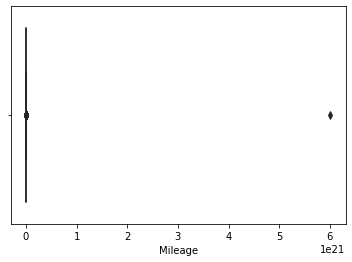

In [12]:
sns.boxplot(x=df['Mileage'],color='g')
plt.show()

In [13]:
Q1 = df['Mileage'].quantile(0.25)
Q3 = df['Mileage'].quantile(0.75)
IQR = Q3 - Q1
outliers = (df['Mileage'] < Q1 - 1.5 * IQR) | (df['Mileage'] > Q3 + 1.5 * IQR)

df_impute = df.copy()
df_impute.loc[outliers, 'Mileage'] = np.nan
zero_mileage = (df_impute['Mileage'] == 0) & (df_impute['age'] > 0) # determining which cars are used & have a Mileage equal to zero
df_impute.loc[zero_mileage, 'Mileage'] = np.nan

imputer = KNNImputer(n_neighbors=5)
df_imputed_values = imputer.fit_transform(df_impute[['Mileage', 'age']])
df.loc[:, ['Mileage', 'age']] = df_imputed_values

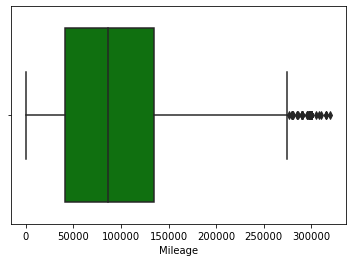

In [14]:
sns.boxplot(x=df['Mileage'],color='g')
plt.show()

we can consider the least outliers as high value of mileage

In [15]:
df['Mileage'].describe()

count      6527.000000
mean      91627.576344
std       63728.923024
min           1.000000
25%       41238.200000
50%       86627.600000
75%      135000.000000
max      320000.000000
Name: Mileage, dtype: float64

In [16]:
df[df.columns[df.isna().any()]].isna().sum()

Previous Owners    1345
dtype: int64

##### Previous Owners

In [17]:
df['Previous Owners'].describe()

count    5182.000000
mean        2.168468
std         1.975429
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        19.000000
Name: Previous Owners, dtype: float64

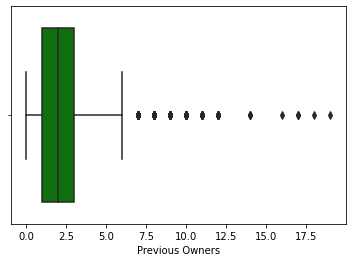

In [18]:
sns.boxplot(x=df['Previous Owners'],color='g')
plt.show()

In [19]:
df['Previous Owners'] = df.groupby(['Car Origin', 'age'])['Previous Owners'].transform(lambda x: x.fillna(x.mean()))

In [20]:
df[df.columns[df.isna().any()]].isna().sum()

Previous Owners    17
dtype: int64

In [21]:
df['Previous Owners'].fillna(df['Previous Owners'].mode().iloc[0], inplace=True)
df['Previous Owners'] = df['Previous Owners'].astype(int)

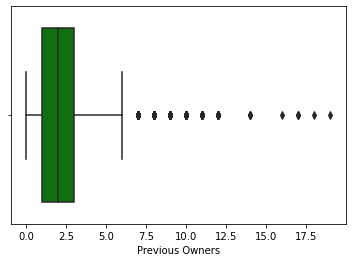

In [22]:
sns.boxplot(x=df['Previous Owners'],color='g')
plt.show()

make sure that the outliers on the graph have an reasonable age

In [23]:
Q1 = df['Previous Owners'].quantile(0.25)
Q3 = df['Previous Owners'].quantile(0.75)
IQR = Q3 - Q1
outliers = (df['Previous Owners'] < Q1 - 1.5 * IQR) | (df['Previous Owners'] > Q3 + 1.5 * IQR)

df[outliers]['age'].unique()

array([39., 34., 50., 19., 13., 47., 40., 18., 25., 21., 17., 31., 38.,
       10., 28., 15., 41., 37., 26., 16., 36., 23., 33., 44., 35., 22.,
       30., 24., 14., 12., 29., 43., 32., 27., 11., 20.])

It's normal that cars that have these numbers of years have a lot of previous owners so we will not change them

In [24]:
df.isna().any().sum()

0

### There's no missing values on the DataFrame now 

## EDA & Feature Engineering 

We already start this step on the previous parts so we will continue

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6527 entries, 0 to 6526
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               6527 non-null   object 
 1   Price              6527 non-null   int64  
 2   Color              6527 non-null   object 
 3   Fuel Type          6527 non-null   object 
 4   Car Origin         6527 non-null   object 
 5   Car License        6527 non-null   object 
 6   Transmission Type  6527 non-null   object 
 7   Glass              6527 non-null   object 
 8   Engine Power       6527 non-null   int64  
 9   Mileage            6527 non-null   float64
 10  Payment Method     6527 non-null   object 
 11  Available          6527 non-null   object 
 12  Previous Owners    6527 non-null   int64  
 13  Air Conditioner    6527 non-null   int64  
 14  Central Locking    6527 non-null   int64  
 15  Alarm System       6527 non-null   int64  
 16  CD Player          6527 

In [26]:
for feature in df:
    print(f'{feature}:{df[feature].unique()}\n')

Make:['ŸÉŸäÿß' 'ŸáŸàŸÜÿØÿßŸä' 'ÿ®Ÿäÿ¨Ÿà' 'ÿ≥ŸÉŸàÿØÿß' 'ÿ≥Ÿàÿ®ÿßÿ±Ÿà' 'ÿ≥Ÿäÿ™' 'ÿßŸàÿØŸä' 'ŸÅŸàŸÑŸÉÿ≥ŸÅÿßÿ¨ŸÜ' 'Dodge'
 'ŸÖÿ±ÿ≥ŸäÿØÿ≥' 'ÿßŸàÿ®ŸÑ' 'ÿ¥ŸÅÿ±ŸàŸÑŸäŸá' 'ŸÅŸàÿ±ÿØ' 'ŸÅŸàŸÑŸÅŸà' 'ÿ≥ÿ™ÿ±ŸàŸäŸÜ' 'ÿ¨ŸäŸäÿ®' 'ÿ™ŸàŸäŸàÿ™ÿß'
 'ÿßŸäÿ≥Ÿàÿ≤Ÿà' 'ÿ±ŸäŸÜŸà' 'ŸÖÿßÿ≤ÿØÿß' 'ŸÅŸäÿßÿ™' 'ÿ®Ÿä' 'ÿØÿßŸäŸà' 'ÿ£ŸÅŸäŸÉŸà' 'ÿßŸÑŸÅÿß' 'ŸÖŸäÿ™ÿ≥Ÿàÿ®Ÿäÿ¥Ÿä'
 'ÿ≥ÿßŸÜÿ∫' 'ÿØÿ±ÿßÿ¨ÿ©' 'ÿ¥ÿßÿ≠ŸÜÿ©' 'ÿ¨Ÿä' 'ŸáŸàŸÜÿØÿß' 'ŸÜŸäÿ≥ÿßŸÜ' 'ÿØÿßŸÅ' 'ŸÑÿßŸÜÿØÿ±ŸàŸÅÿ±' 'ÿ±ŸàŸÅÿ±'
 'ÿØÿßÿ™ÿ¥Ÿäÿß' 'ŸÉÿßÿØŸäŸÑÿßŸÉ' 'ÿ®ÿßÿµ' 'ÿ≥Ÿàÿ≤ŸàŸÉŸä' 'ÿØŸäŸáÿßÿ™ÿ≥Ÿà' 'ÿ¨ÿßÿ¨Ÿàÿßÿ±']

Price:[ 44000  58000  40000  70000  33000  78000  18000  30000  60000 125000
  25000  32000  42000  39500 155000  23000  95000 175000  65300  13000
  90000  85000  10000  36500  63000  47000  48000  98000  50000 115000
  27000  24000  35000  86000  19000  68000  39000  45000  56000 100000
 230000 110000  62000  38000  75000 120000  83000 109999  37000 350000
 170000  65000  80000  20000  44999 113000  55000   5000  97000  69000
  41000  89000   6000  720

Small detail to change : 'Dodge' => 'ÿØŸàÿØÿ¨' on make column 

In [27]:
df['Make'].replace({'Dodge': 'ÿØŸàÿØÿ¨'}, inplace=True)

In [28]:
df = df[[col for col in df.columns if col != 'Price'] + ['Price']]

In [29]:
df.to_csv('../csv_files/result.csv', index=False)

In [30]:
df['Mileage/Year'] = np.where(df['age'] != 0, df['Mileage'] / df['age'], np.nan)
df['Mileage/Year'] = df['Mileage/Year'].round(2)

/var/folders/jv/c9vh4bnj087cpqc52674mcsh0000gn/T/ipykernel_21699/2593183645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mileage/Year'] = np.where(df['age'] != 0, df['Mileage'] / df['age'], np.nan)
/var/folders/jv/c9vh4bnj087cpqc52674mcsh0000gn/T/ipykernel_21699/2593183645.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mileage/Year'] = df['Mileage/Year'].round(2)


In [31]:
df

Make  Color Fuel Type Car Origin Car License Transmission Type  \
0        ŸÉŸäÿß   ÿ£ÿ≥ŸàÿØ     ÿ®ŸÜÿ≤ŸäŸÜ      ÿÆÿµŸàÿµŸä    ŸÅŸÑÿ≥ÿ∑ŸäŸÜŸäÿ©         ÿßŸàÿ™ŸàŸÖÿßÿ™ŸäŸÉ   
1     ŸáŸàŸÜÿØÿßŸä    ŸÅÿ∂Ÿä     ÿ®ŸÜÿ≤ŸäŸÜ      ÿÆÿµŸàÿµŸä    ŸÅŸÑÿ≥ÿ∑ŸäŸÜŸäÿ©         ÿßŸàÿ™ŸàŸÖÿßÿ™ŸäŸÉ   
2       ÿ®Ÿäÿ¨Ÿà   ÿ£ÿ≥ŸàÿØ     ÿ®ŸÜÿ≤ŸäŸÜ      ÿÆÿµŸàÿµŸä    ŸÅŸÑÿ≥ÿ∑ŸäŸÜŸäÿ©     ŸÜÿµŸÅ ÿßŸàÿ™ŸàŸÖÿßÿ™ŸäŸÉ   
3      ÿ≥ŸÉŸàÿØÿß   ÿ£ÿ≤ÿ±ŸÇ      ÿØŸäÿ≤ŸÑ      ÿÆÿµŸàÿµŸä    ŸÅŸÑÿ≥ÿ∑ŸäŸÜŸäÿ©              ÿπÿßÿØŸä   
4     ÿ≥Ÿàÿ®ÿßÿ±Ÿà  ÿ±ÿµÿßÿµŸä     ÿ®ŸÜÿ≤ŸäŸÜ      ÿÆÿµŸàÿµŸä    ŸÅŸÑÿ≥ÿ∑ŸäŸÜŸäÿ©              ÿπÿßÿØŸä   
...      ...    ...       ...        ...         ...               ...   
6522    ŸÅŸäÿßÿ™   ÿ£ÿ≠ŸÖÿ±     ÿ®ŸÜÿ≤ŸäŸÜ      ÿÆÿµŸàÿµŸä    ŸÅŸÑÿ≥ÿ∑ŸäŸÜŸäÿ©              ÿπÿßÿØŸä   
6523  ŸáŸàŸÜÿØÿßŸä   ÿ£ÿ≥ŸàÿØ      ÿØŸäÿ≤ŸÑ      ÿÆÿµŸàÿµŸä    ŸÅŸÑÿ≥ÿ∑ŸäŸÜŸäÿ©         ÿßŸàÿ™ŸàŸÖÿßÿ™ŸäŸÉ   
6524  ŸáŸàŸÜÿØÿßŸä    ŸÅÿ∂Ÿä     ÿ®ŸÜÿ≤ŸäŸÜ      ÿÆÿµŸàÿµŸä    ŸÅŸÑÿ≥ÿ∑ŸäŸÜŸäÿ©         ÿßŸàÿ™ŸàŸÖÿßÿ™ŸäŸÉ   
6525   ÿ≥ŸÉŸàÿØÿß   ÿ£ÿ®Ÿäÿ∂     ÿ®ŸÜÿ≤ŸäŸÜ      ÿÆÿµŸàÿµŸä    ŸÅŸÑÿ≥ÿ∑ŸäŸÜŸäÿ©         ÿßŸàÿ™ŸàŸÖÿßÿ™ŸäŸÉ   
6526     ÿ≥Ÿäÿ™   ÿ≥ŸÉŸÜŸä     ÿ®ŸÜÿ≤ŸäŸÜ      ÿÆÿµŸàÿµŸä    ŸÅŸÑÿ≥ÿ∑ŸäŸÜŸäÿ©              ÿπÿßÿØŸä   

         Glass  Engine Power   Mileage   Payment Method         Available  \
0     ÿßŸÑŸÉÿ™ÿ±ŸàŸÜŸä          1600  183000.0  ÿ•ŸÖŸÉÿßŸÜŸäÿ© ÿßŸÑÿ™ŸÇÿ≥Ÿäÿ∑         ŸÑŸÑÿ®Ÿäÿπ ŸÅŸÇÿ∑   
1     ÿßŸÑŸÉÿ™ÿ±ŸàŸÜŸä          1400   42000.0         ŸÜŸÇÿØÿß ŸÅŸÇÿ∑  ŸÑŸÑÿ®Ÿäÿπ ÿ£Ÿà ÿßŸÑÿ™ÿ®ÿØŸäŸÑ   
2     ÿßŸÑŸÉÿ™ÿ±ŸàŸÜŸä          2000   85000.0  ÿ•ŸÖŸÉÿßŸÜŸäÿ© ÿßŸÑÿ™ŸÇÿ≥Ÿäÿ∑         ŸÑŸÑÿ®Ÿäÿπ ŸÅŸÇÿ∑   
3     ÿßŸÑŸÉÿ™ÿ±ŸàŸÜŸä          1900   30000.0  ÿ•ŸÖŸÉÿßŸÜŸäÿ© ÿßŸÑÿ™ŸÇÿ≥Ÿäÿ∑  ŸÑŸÑÿ®Ÿäÿπ ÿ£Ÿà ÿßŸÑÿ™ÿ®ÿØŸäŸÑ   
4     ÿßŸÑŸÉÿ™ÿ±ŸàŸÜŸä          1600   41238.2         ŸÜŸÇÿØÿß ŸÅŸÇÿ∑         ŸÑŸÑÿ®Ÿäÿπ ŸÅŸÇÿ∑   
...        ...           ...       ...              ...               ...   
6522      ŸäÿØŸàŸä          1800   50000.0         ŸÜŸÇÿØÿß ŸÅŸÇÿ∑         ŸÑŸÑÿ®Ÿäÿπ ŸÅŸÇÿ∑   
6523  ÿßŸÑŸÉÿ™ÿ±ŸàŸÜŸä          2000     140.0         ŸÜŸÇÿØÿß ŸÅŸÇÿ∑         ŸÑŸÑÿ®Ÿäÿπ ŸÅŸÇÿ∑   
6524  ÿßŸÑŸÉÿ™ÿ±ŸàŸÜŸä          1400      40.0         ŸÜŸÇÿØÿß ŸÅŸÇÿ∑         ŸÑŸÑÿ®Ÿäÿπ ŸÅŸÇÿ∑   
6525  ÿßŸÑŸÉÿ™ÿ±ŸàŸÜŸä          1200   60000.0         ŸÜŸÇÿØÿß ŸÅŸÇÿ∑  ŸÑŸÑÿ®Ÿäÿπ ÿ£Ÿà ÿßŸÑÿ™ÿ®ÿØŸäŸÑ   
6526  ÿßŸÑŸÉÿ™ÿ±ŸàŸÜŸä          1400   82000.0  ÿ•ŸÖŸÉÿßŸÜŸäÿ© ÿßŸÑÿ™ŸÇÿ≥Ÿäÿ∑         ŸÑŸÑÿ®Ÿäÿπ ŸÅŸÇÿ∑   

      Previous Owners  Air Conditioner  Central Locking  Alarm System  \
0                   1                1                1             1   
1                   1                1                1             1   
2                   2                1                1             1   
3                   3                1                1             1   
4                   2                1                1             1   
...               ...              ...              ...           ...   
6522                7                0                0             0   
6523                1                1                1             1   
6524                1                1                1             1   
6525                2                1                1             1   
6526                1                1                1             1   

      CD Player  Sunroof  Alloy Wheels  Leather Seats  Airbag  \
0             1        0             0              1       1   
1             0        0             1              1       1   
2             1        1             1              1       1   
3             1        0             1              1       1   
4             1        0             1              0       1   
...         ...      ...           ...            ...     ...   
6522          1        0             0              1       0   
6523          0        1             1              1       1   
6524          1        0             1              1       1   
6525          1        0             1              0    

In [32]:
df.corr()

Engine Power   Mileage  Previous Owners  Air Conditioner  \
Engine Power         1.000000  0.120335         0.017775         0.032058   
Mileage              0.120335  1.000000         0.102215         0.035769   
Previous Owners      0.017775  0.102215         1.000000        -0.281543   
Air Conditioner      0.032058  0.035769        -0.281543         1.000000   
Central Locking      0.026027  0.023015        -0.244349         0.643269   
Alarm System         0.074331 -0.047172        -0.188861         0.444862   
CD Player            0.079532  0.023640        -0.071285         0.481854   
Sunroof              0.215490 -0.018643        -0.069374         0.179348   
Alloy Wheels         0.048004 -0.009337        -0.087397         0.385617   
Leather Seats        0.157693 -0.049885        -0.101389         0.257362   
Airbag               0.034880  0.003997        -0.276312         0.623726   
Passenger Count      0.291451  0.016633        -0.029663         0.047927   
age                  0.095129  0.079655         0.605540        -0.477027   
Price                0.231600 -0.072708        -0.319212         0.235373   
Mileage/Year         0.015621  0.630254        -0.212473         0.173823   

                 Central Locking  Alarm System  CD Player   Sunroof  \
Engine Power            0.026027      0.074331   0.079532  0.215490   
Mileage                 0.023015     -0.047172   0.023640 -0.018643   
Previous Owners        -0.244349     -0.188861  -0.071285 -0.069374   
Air Conditioner         0.643269      0.444862   0.481854  0.179348   
Central Locking         1.000000      0.506364   0.458591  0.199682   
Alarm System            0.506364      1.000000   0.393553  0.206351   
CD Player               0.458591      0.393553   1.000000  0.146497   
Sunroof                 0.199682      0.206351   0.146497  1.000000   
Alloy Wheels            0.405883      0.344855   0.337289  0.275079   
Leather Seats           0.258490      0.310163   0.265079  0.313890   
Airbag                  0.650569      0.464987   0.433299  0.184157   
Passenger Count         0.047221      0.040885   0.030570  0.038472   
age                    -0.406764     -0.302440  -0.154681 -0.095705   
Price                   0.212864      0.218042   0.119167  0.297950   
Mileage/Year            0.150440      0.085635   0.055956  0.028437   

                 Alloy Wheels  Leather Seats    Airbag  Passenger Count  \
Engine Power         0.048004       0.157693  0.034880         0.291451   
Mileage             -0.009337      -0.049885  0.003997         0.016633   
Previous Owners     -0.087397      -0.101389 -0.276312        -0.029663   
Air Conditioner      0.385617       0.257362  0.623726         0.047927   
Central Locking      0.405883       0.258490  0.650569         0.047221   
Alarm System         0.344855       0.310163  0.464987         0.040885   
CD Player            0.337289       0.265079  0.433299         0.030570   
Sunroof              0.275079       0.313890  0.184157         0.038472   
Alloy Wheels         1.000000       0.334932  0.401842         0.027713   
Leather Seats        0.334932       1.000000  0.270708         0.083314   
Airbag               0.401842       0.270708  1.000000         0.072298   
Passenger Count      0.027713       0.083314  0.072298         1.000000   
age                 -0.217030      -0.170189 -0.467199        -0.023880   
Price                0.194235       0.229781  0.239801         0.140248   
Mileage/Year         0.091508       0.055849  0.166388         0.032649   

                      age     Price  Mileage/Year  
Engine Power     0.095129  0.231600      0.015621  
Mileage          0.079655 -0.072708      0.630254  
Previous Owners  0.605540 -0.319212     -0.212473  
Air Conditioner -0.477027  0.235373      0.173823  
Central Locking -0.406764  0.212864      0.150440  
Alarm System    -0.302440  0.218042      0.085635  
CD Player       -0.154681  0.119167      0.055956  
Sunroof         -0.095705  0.2

<AxesSubplot:>

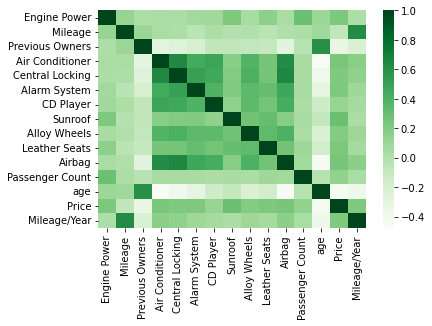

In [33]:
sns.heatmap(df.corr(),cmap='Greens')

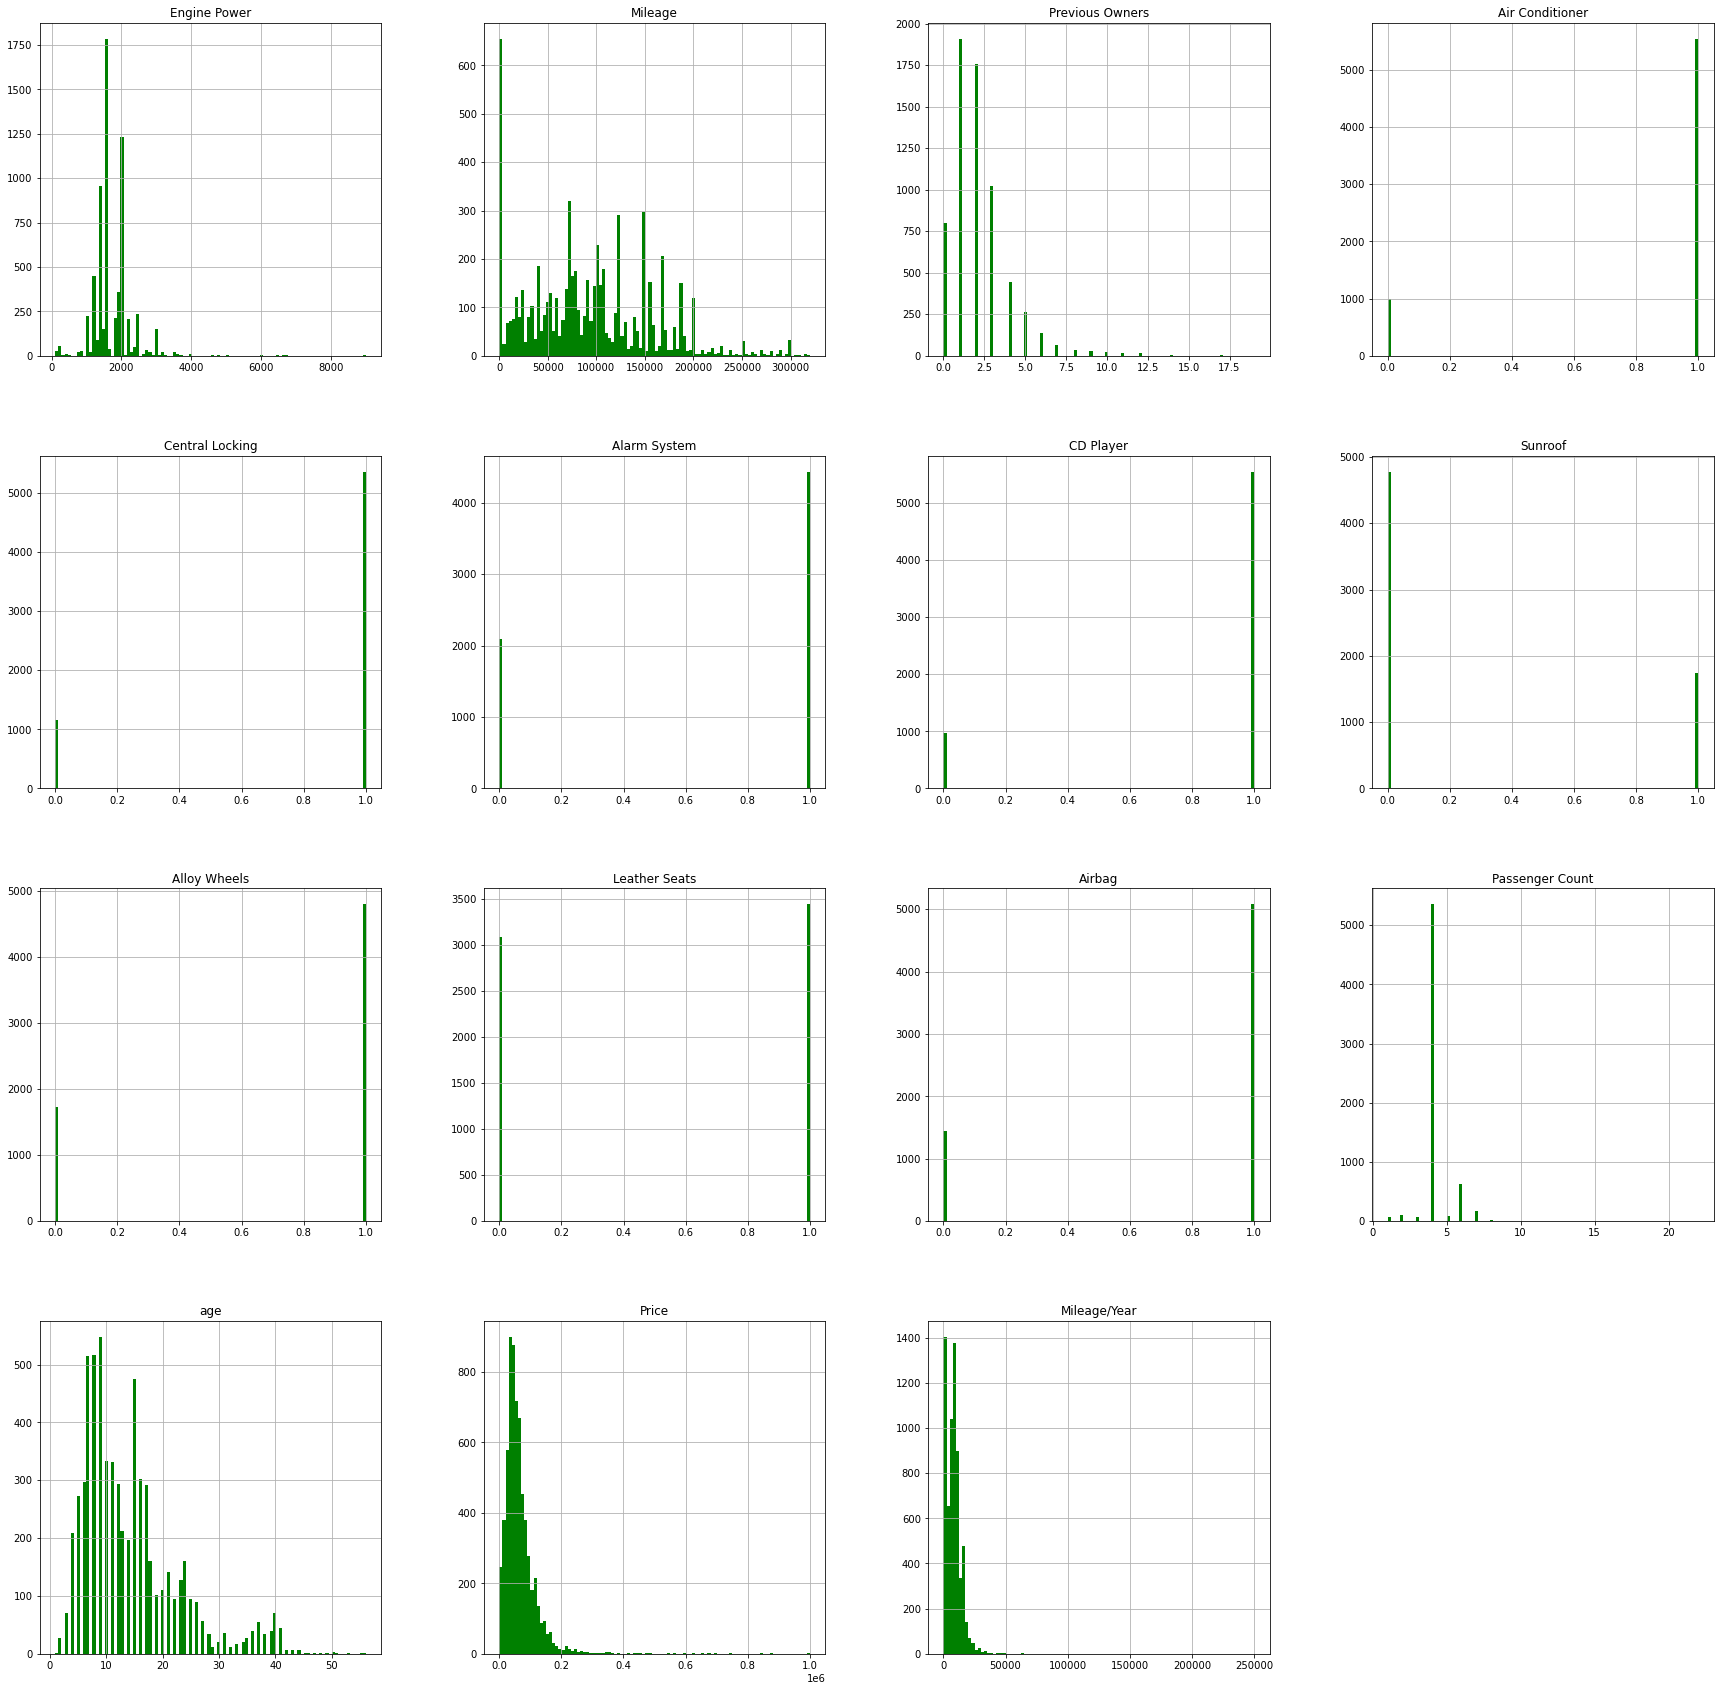

In [34]:
df.hist(bins=100, figsize=(30,30),color='g')
plt.show()

<AxesSubplot:>

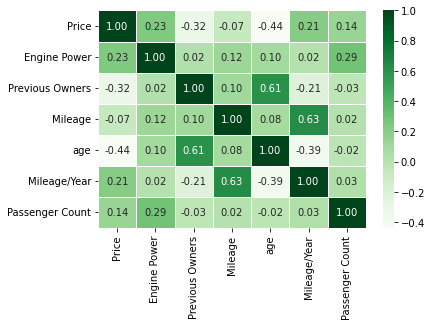

In [35]:
important_numeric_features= df[['Price', 'Engine Power','Previous Owners', 'Mileage', 'age', 'Mileage/Year','Passenger Count']]
corr = important_numeric_features.corr()
sns.heatmap(corr, annot=True, cmap='Greens', fmt='.2f', linewidths=0.5)

The columns that have highest Correlation with the Price are the age > Previous owners > Engine Power > Mileage/year
The columns of Mileage and Passenger Count have week correlation with the Price

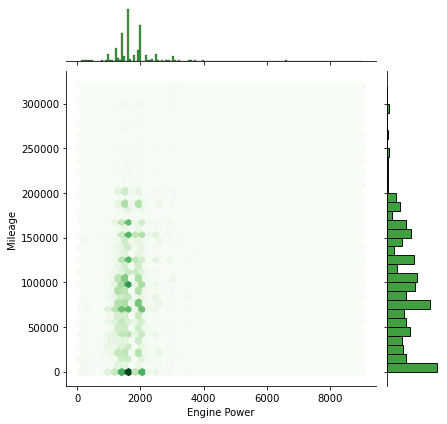

In [36]:
sns.jointplot(x='Engine Power',y='Mileage',data=df,kind='hex',cmap='Greens',color='g')

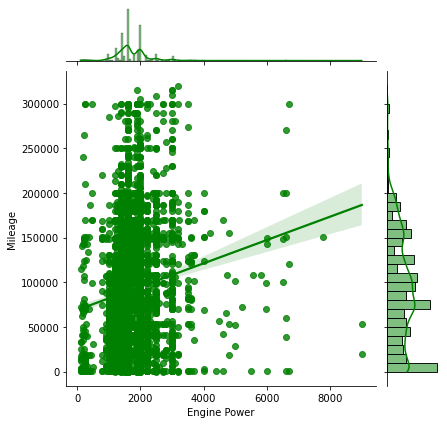

In [37]:
sns.jointplot(x='Engine Power',y='Mileage',data=df,kind='reg',color='g')

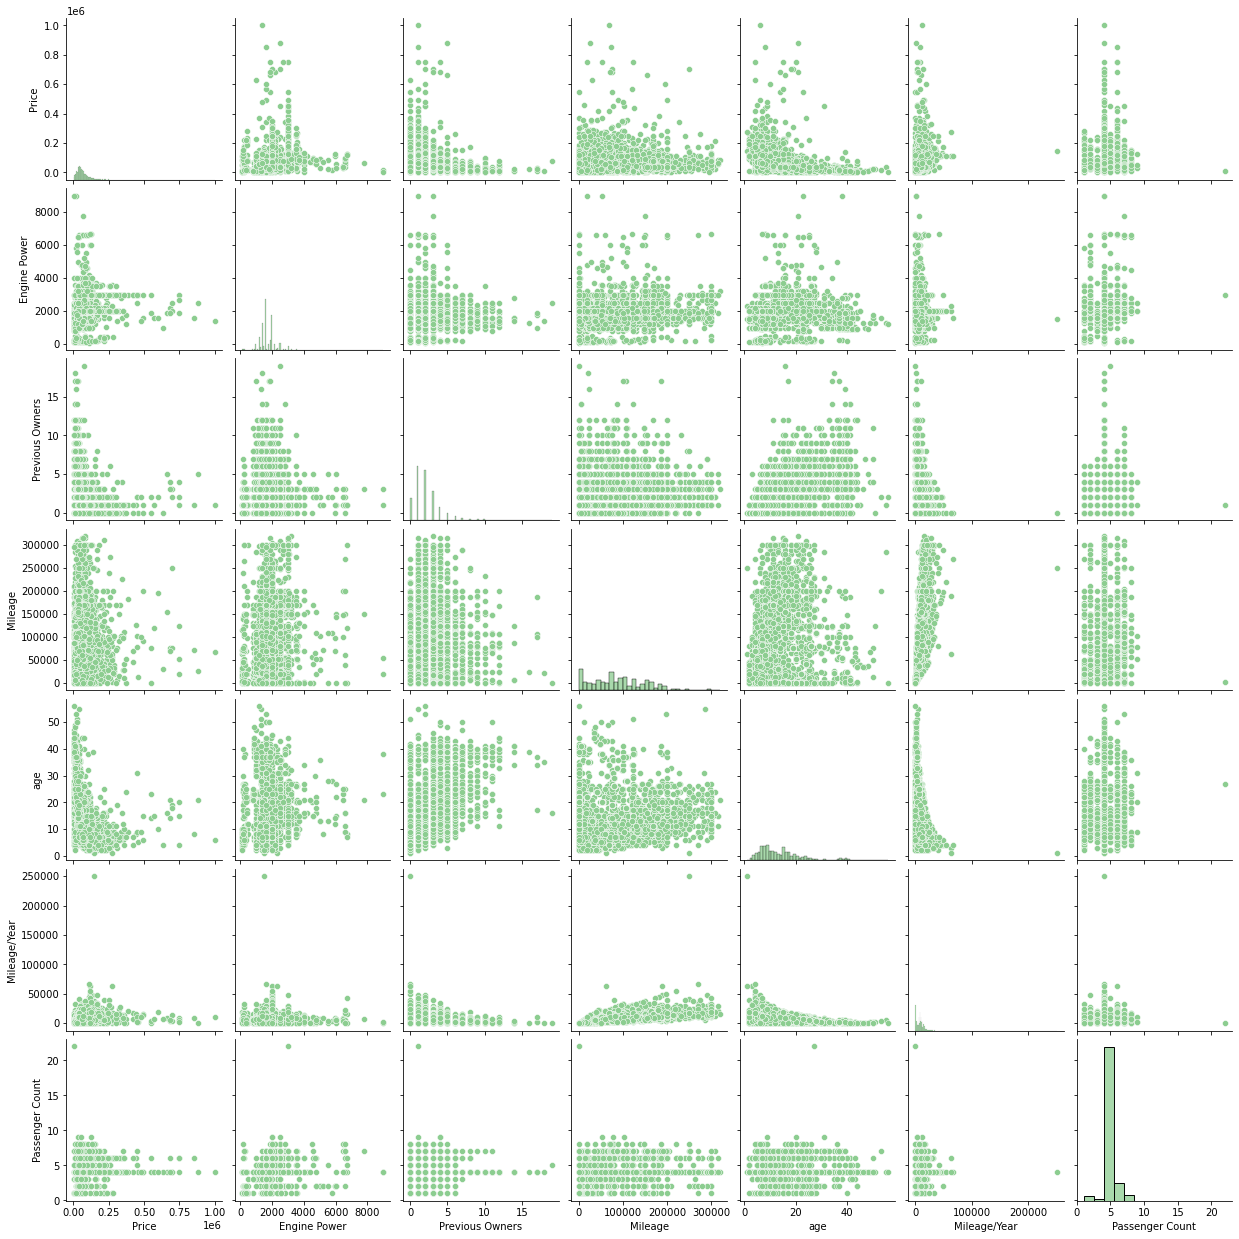

In [38]:
sns.set_palette('Greens_d')
sns.pairplot(important_numeric_features)

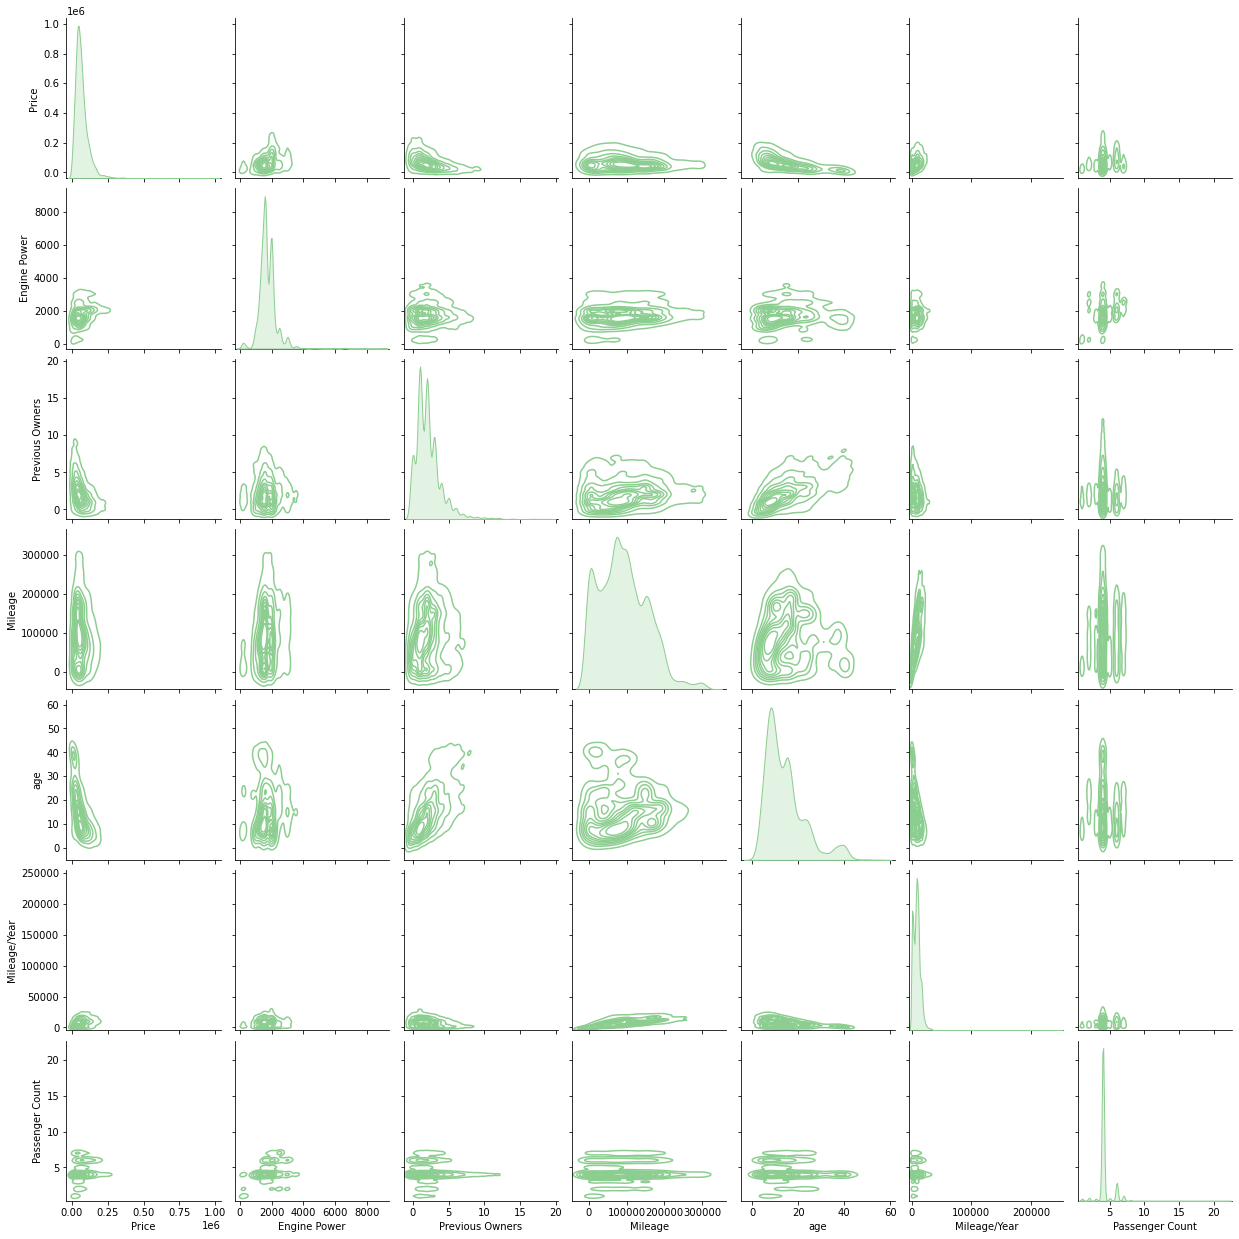

In [39]:
sns.pairplot(important_numeric_features, kind="kde", palette='Greens_d')

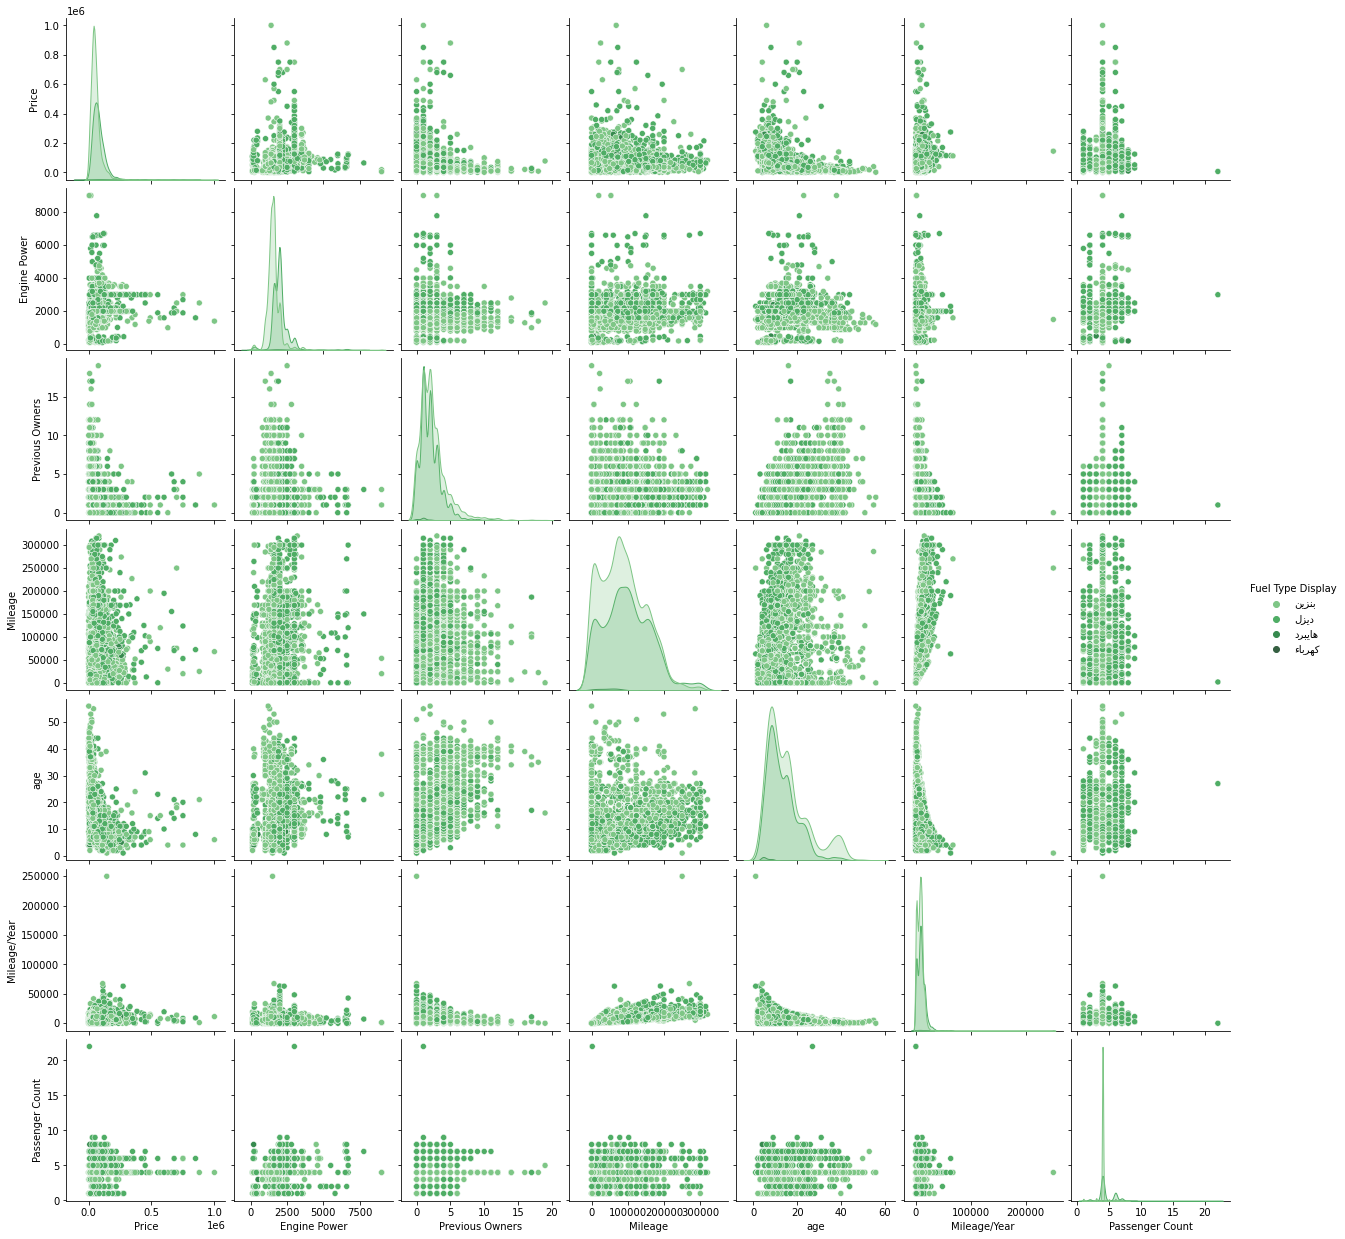

In [40]:
merged_df = pd.merge(important_numeric_features, df[['Fuel Type']], left_index=True, right_index=True)
merged_df['Fuel Type Display'] = merged_df['Fuel Type'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))
sns.pairplot(merged_df,hue='Fuel Type Display', palette='Greens_d')

/var/folders/jv/c9vh4bnj087cpqc52674mcsh0000gn/T/ipykernel_21699/1446301289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fuel Type']=df['Fuel Type'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))
/var/folders/jv/c9vh4bnj087cpqc52674mcsh0000gn/T/ipykernel_21699/1446301289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Make'] = df['Make'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))


<AxesSubplot:xlabel='Make', ylabel='Price'>

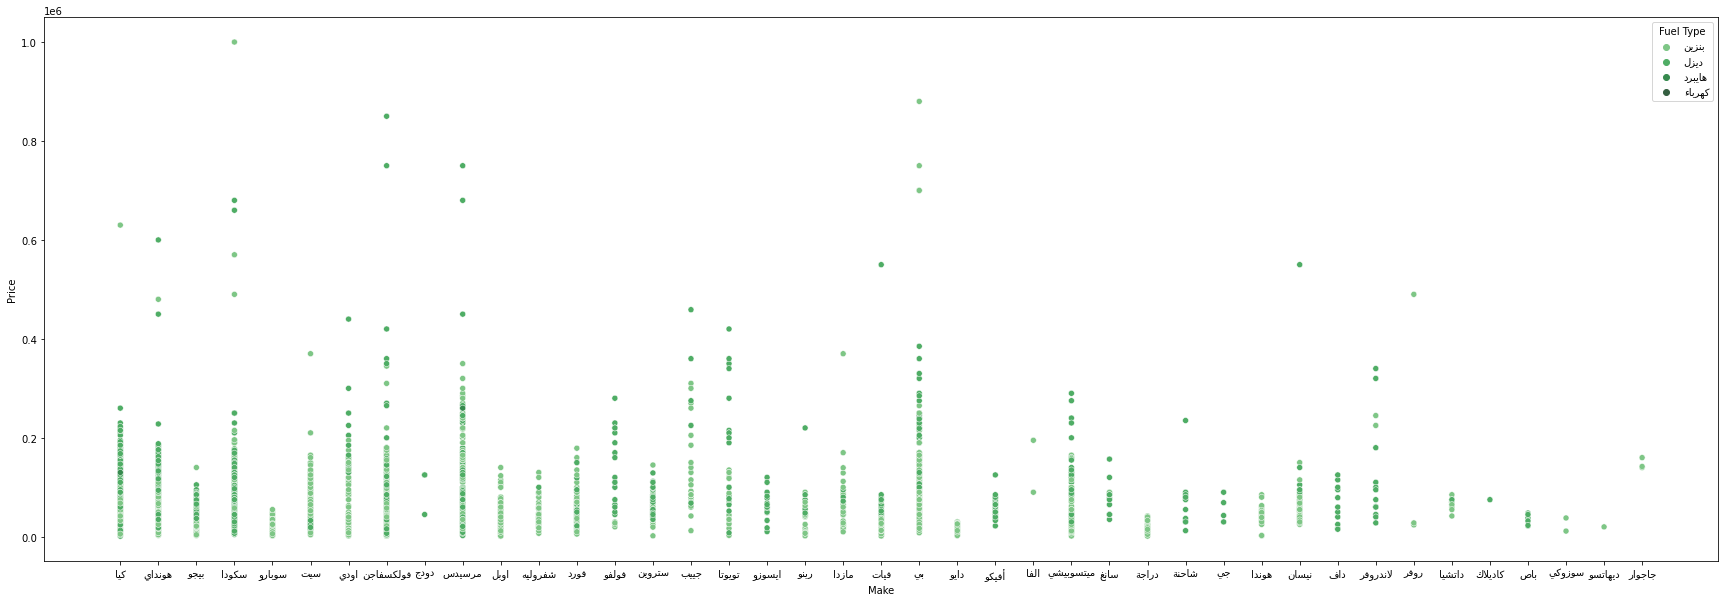

In [41]:
df['Fuel Type']=df['Fuel Type'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))
df['Make'] = df['Make'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))
plt.figure(figsize=(30, 10))
sns.scatterplot(data=df, x="Make", y="Price", hue="Fuel Type", palette='Greens_d')

/var/folders/jv/c9vh4bnj087cpqc52674mcsh0000gn/T/ipykernel_21699/1083140659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Car Origin'] = df['Car Origin'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))


<AxesSubplot:xlabel='Passenger Count', ylabel='Car Origin'>

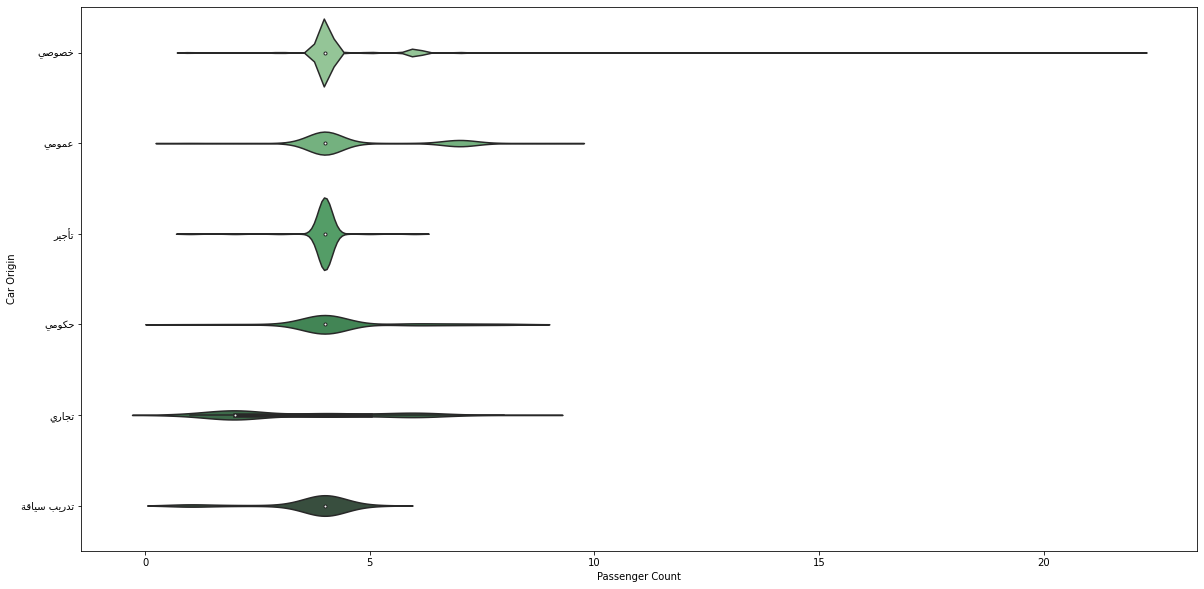

In [42]:
df['Car Origin'] = df['Car Origin'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))
plt.figure(figsize=(20, 10))
sns.violinplot(x="Passenger Count", y="Car Origin", data=df,palette='Greens_d')

<AxesSubplot:xlabel='Passenger Count', ylabel='Price'>

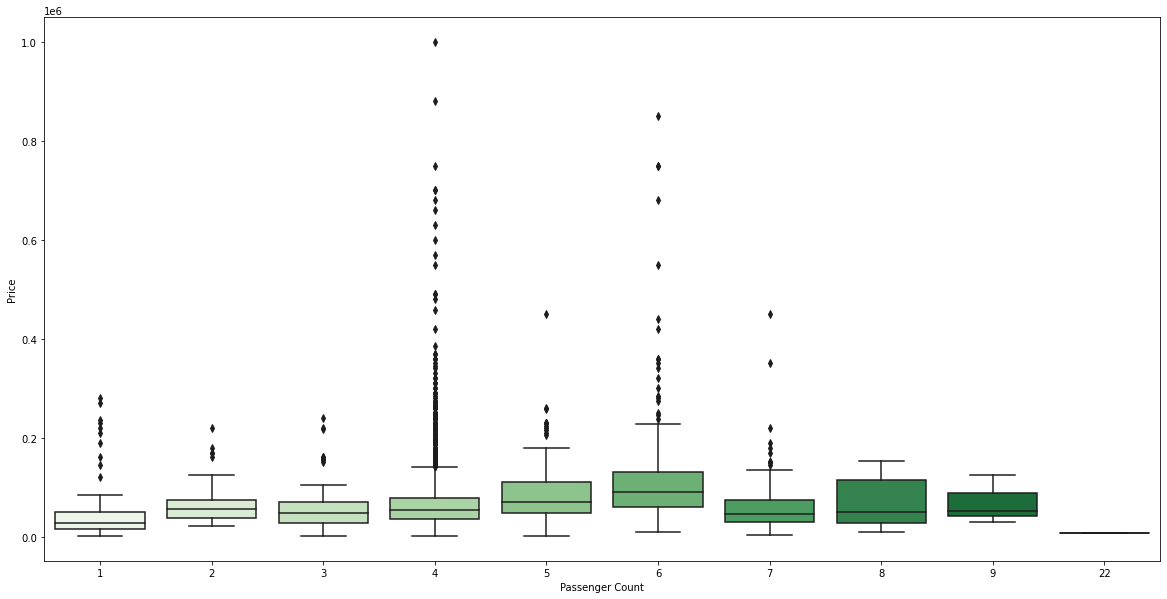

In [43]:
plt.figure(figsize=(20, 10))
sns.boxplot(x = 'Passenger Count', y = 'Price', data = df,palette='Greens')

/var/folders/jv/c9vh4bnj087cpqc52674mcsh0000gn/T/ipykernel_21699/1919817799.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transmission Type'] = df['Transmission Type'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))
/Users/halakhalifa/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


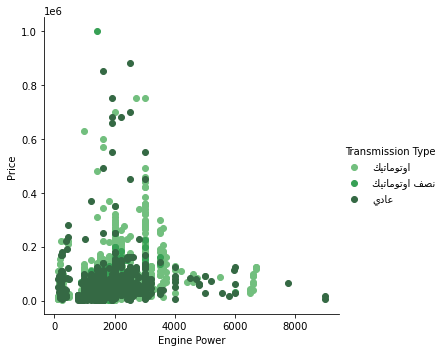

In [44]:
df['Transmission Type'] = df['Transmission Type'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))
sns.FacetGrid(df,hue="Transmission Type",size=5,palette="Greens_d").map(plt.scatter,"Engine Power","Price").add_legend();
plt.show()

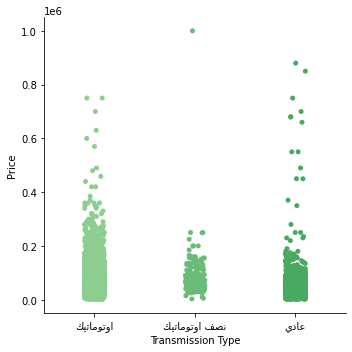

In [45]:
sns.catplot(data=df, x='Transmission Type', y='Price')

/Users/halakhalifa/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


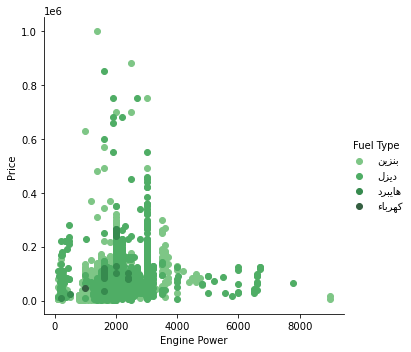

In [46]:
sns.FacetGrid(df,hue="Fuel Type",size=5,palette="Greens_d").map(plt.scatter,"Engine Power","Price").add_legend();

<AxesSubplot:xlabel='Fuel Type', ylabel='Price'>

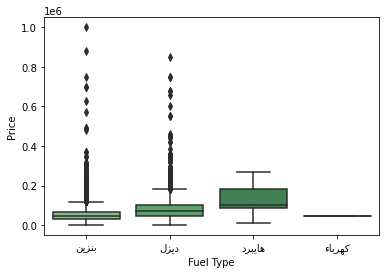

In [47]:
sns.boxplot(x = 'Fuel Type', y = 'Price', data = df, palette='Greens_d')

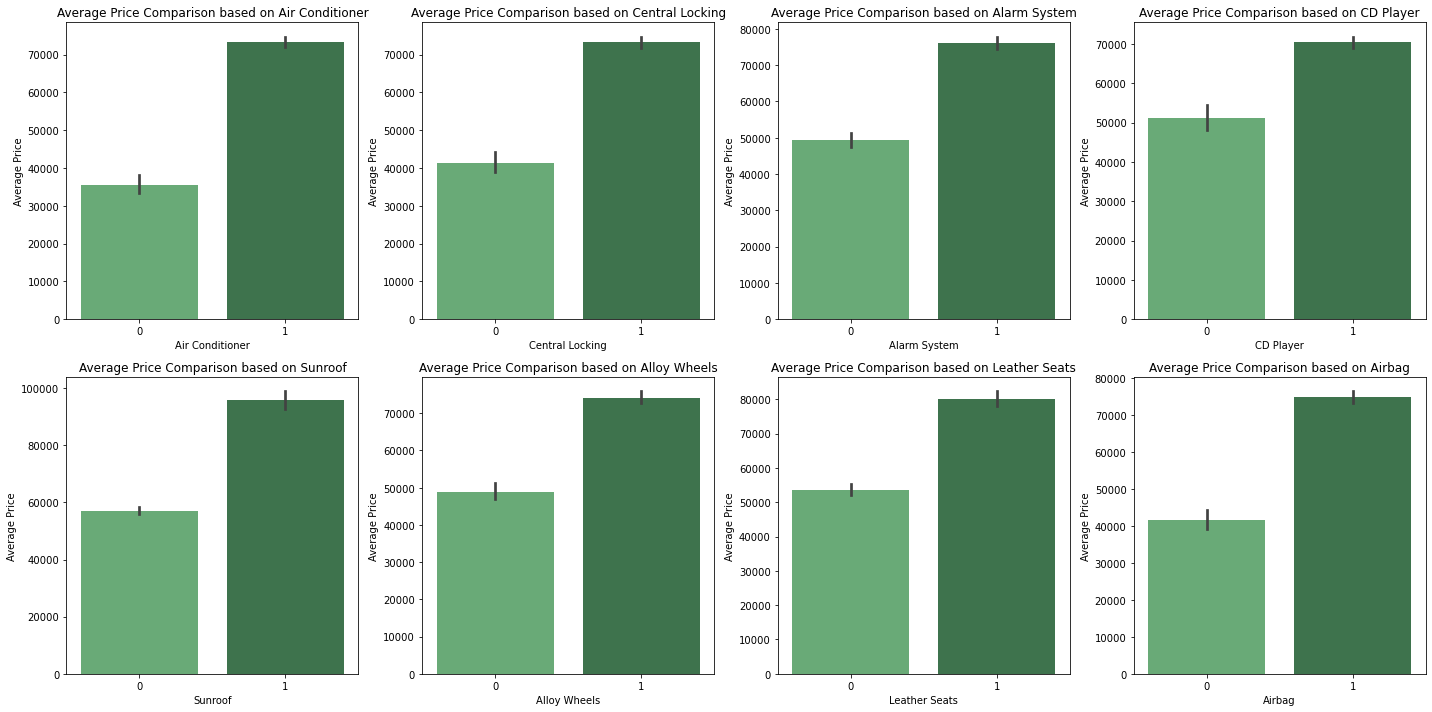

In [48]:
binary_features = ['Air Conditioner', 'Central Locking', 'Alarm System', 'CD Player', 
                   'Sunroof', 'Alloy Wheels', 'Leather Seats', 'Airbag']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Loop through binary features and create bar plots
for i, feature in enumerate(binary_features):
    sns.barplot(x=feature, y='Price', data=df, palette='Greens_d', ax=axes[i])
    axes[i].set_title(f'Average Price Comparison based on {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Average Price')

# Adjust layout
plt.tight_layout()

<AxesSubplot:xlabel='Sunroof', ylabel='Price'>

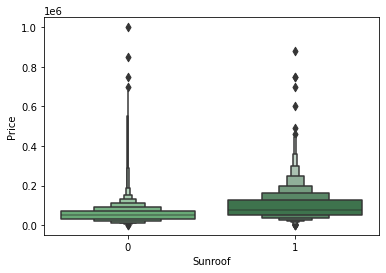

In [49]:
sns.boxenplot(x=df['Sunroof'], y=df['Price'],palette='Greens_d')